In [1]:
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = 'netcdf4/ASCATL1SZR_20200121T221800Z_20200122T000258Z_epct_79ef313d_F.nc'

In [3]:
data = xr.open_dataset(fname)
data

<xarray.Dataset>
Dimensions:              (y: 3360, x: 82)
Coordinates:
    latitude             (y, x) float32 ...
    longitude            (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables: (12/43)
    azi_angle_trip_fore  (y, x) float32 ...
    azi_angle_trip_mid   (y, x) float32 ...
    azi_angle_trip_aft   (y, x) float32 ...
    f_kp_fore            (y, x) float32 ...
    f_kp_mid             (y, x) float32 ...
    f_kp_aft             (y, x) float32 ...
    ...                   ...
    f_tel_fore           (y, x) float32 ...
    f_tel_mid            (y, x) float32 ...
    f_tel_aft            (y, x) float32 ...
    f_v_fore             (y, x) float32 ...
    f_v_mid              (y, x) float32 ...
    f_v_aft              (y, x) float32 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20200121T221800Z
    stop_sensing_time:         20200122T000258.125000Z
    EPCT_geospatial_lat_max:   0.0000
    EPCT_geospatial_lat_min:   0.0000
    EPCT_geospatial_lon_max:   0.0000
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.2.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

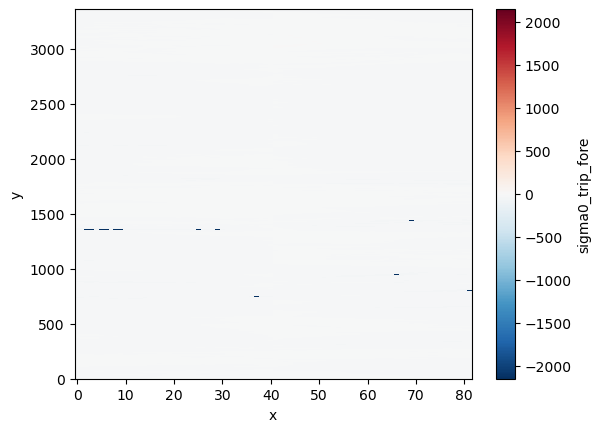

In [4]:
data['sigma0_trip_fore'].plot()

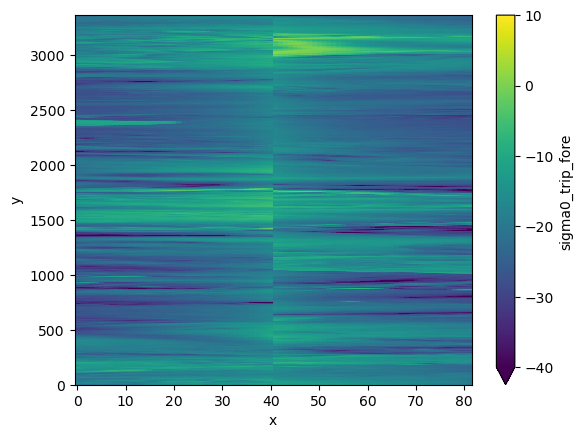

In [5]:
data['sigma0_trip_fore'].plot(vmax=10, vmin = -40)

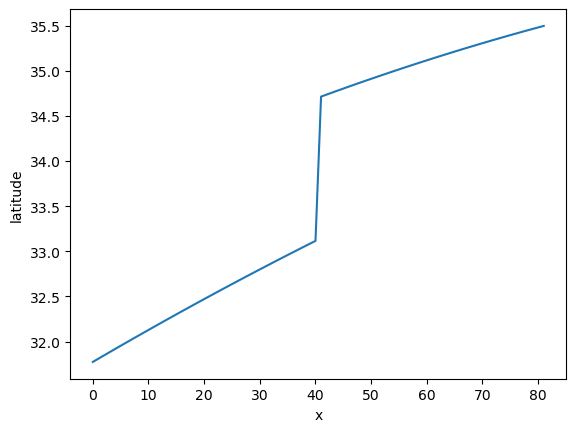

In [6]:
data['latitude'][500, :].plot()

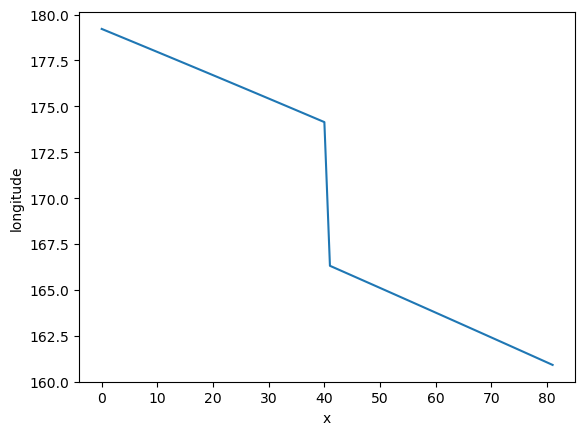

In [7]:
data['longitude'][500, :].plot()

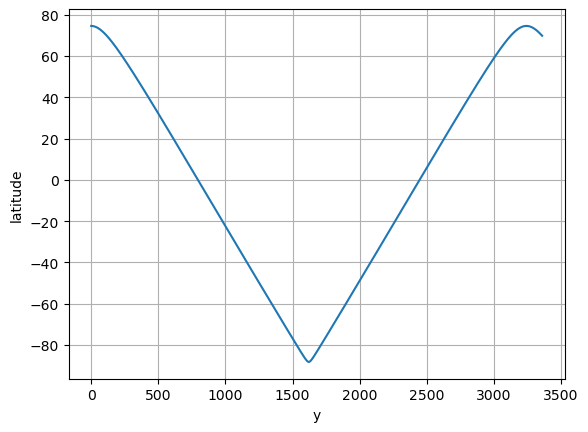

In [8]:
data['latitude'][:, 10].plot()
plt.grid()

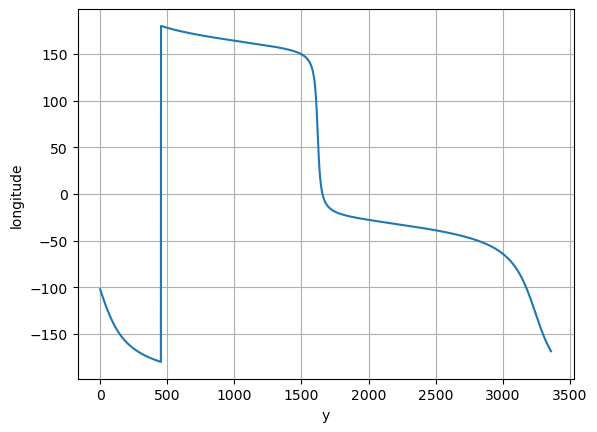

In [9]:
data['longitude'][:, 10].plot()
plt.grid()

In [10]:
fname = 'netcdf4_satellite/W_XX-EUMETSAT-Darmstadt,SURFACE+SATELLITE,METOPC+ASCAT_C_EUMP_20200121221800_6264_eps_o_125_l1.nc'

In [11]:
data = xr.open_dataset(fname)
data

/home/paulinast/.conda/envs/phd2023/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


<xarray.Dataset>
Dimensions:            (numRows: 3360, numSigma: 3, numCells: 82)
Coordinates:
    sigma0             (numSigma) int16 ...
    lat                (numRows, numCells) float64 ...
    lon                (numRows, numCells) float64 ...
Dimensions without coordinates: numRows, numSigma, numCells
Data variables: (12/21)
    record_start_time  (numRows) object ...
    record_stop_time   (numRows) object ...
    utc_line_nodes     (numRows) datetime64[ns] ...
    abs_line_number    (numRows) float64 ...
    as_des_pass        (numRows) float32 ...
    sat_track_azi      (numRows) float32 ...
    ...                 ...
    f_v                (numRows, numCells, numSigma) float32 ...
    f_oa               (numRows, numCells, numSigma) float32 ...
    f_sa               (numRows, numCells, numSigma) float32 ...
    f_tel              (numRows, numCells, numSigma) float32 ...
    f_ref              (numRows, numCells, numSigma) float32 ...
    f_land             (numRows, numCells, numSigma) float32 ...
Attributes: (12/68)
    creator_name:                         EUMETSAT
    creator_url:                          http://www.eumetsat.int
    creator_email:                        ops@eumetsat.int
    institution:                          EUMETSAT
    license:                              CopyRight EUMETSAT 2023
    Conventions:                          CF-1.7
    ...                                   ...
    pixel_size_on_horizontal:             12500m
    land_seamask_file_pointer:            xxxx_LSM_xx_xxx_20060717000000Z_xxx...
    orbit_prediction_file_point:          xxxx_OSV_xx_M03_20200121000000Z_202...
    normalisation_file_pointer:           NTB_data
    processing_parameter_file_pointer:    ASCA_PRC_xx_M03_20190226160000Z_xxx...
    instrument_parameter_file_pointer:    ASCA_INS_xx_M03_20190226000000Z_xxx...

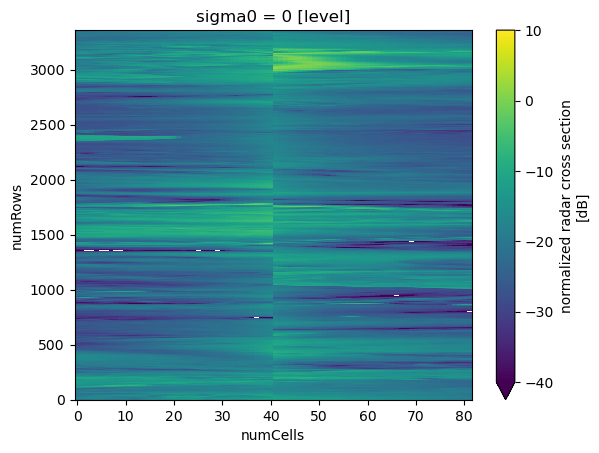

In [12]:
data['sigma0_trip'][:, :, 0].plot(vmax=10, vmin = -40)

In [13]:
data['sigma0'][0]

<xarray.DataArray 'sigma0' ()>
[1 values with dtype=int16]
Coordinates:
    sigma0   int16 ...
Attributes:
    long_name:                 Sigma0
    units:                     level
    valid_min:                 0
    valid_max:                 2
    positive:                  down
    definition:                0: FORE, 1: MID, 2: AFT
    flag_meaning:              Forward, Middle, After
    _CoordinateTransformType:  Vertical
    _CoordinateAxisType:       GeoZ
    _CoordinateZisPositive:    down

In [14]:
data.lat[0:10, 0:10]

<xarray.DataArray 'lat' (numRows: 10, numCells: 10)>
[100 values with dtype=float64]
Coordinates:
    lat      (numRows, numCells) float64 ...
    lon      (numRows, numCells) float64 ...
Dimensions without coordinates: numRows, numCells
Attributes:
    standard_name:  grid_latitude
    long_name:      latitude
    units:          degrees_north
    valid_min:      -90000000
    valid_max:      90000000

In [15]:
data.lon[0:10, 0:10]

<xarray.DataArray 'lon' (numRows: 10, numCells: 10)>
[100 values with dtype=float64]
Coordinates:
    lat      (numRows, numCells) float64 ...
    lon      (numRows, numCells) float64 ...
Dimensions without coordinates: numRows, numCells
Attributes:
    standard_name:  grid_longitude
    long_name:      longitude
    units:          degrees_east
    valid_min:      -1800000000
    valid_max:      1800000000

In [16]:
lat_station = 75
lon_station = -106

In [17]:
# First, find the index of the grid point nearest a specific lat/lon.   
def get_nearest_x_y(ds, lat_station, lon_station):
    abslat = np.abs(ds.lat - lat_station)
    abslon = np.abs(ds.lon - lon_station)
    c = np.maximum(abslat, abslon)

    y, x = np.where(c == np.min(c))
    return x[0], y[0]

In [18]:
x_station, y_station = get_nearest_x_y(data, lat_station, lon_station)

In [19]:
x_station

14

In [20]:
y_station

9

In [21]:
data.lat[y_station, x_station]

<xarray.DataArray 'lat' ()>
array(74.986161)
Coordinates:
    lat      float64 74.99
    lon      float64 -106.1
Attributes:
    standard_name:  grid_latitude
    long_name:      latitude
    units:          degrees_north
    valid_min:      -90000000
    valid_max:      90000000

In [22]:
data.lon[y_station, x_station]

<xarray.DataArray 'lon' ()>
array(-106.078622)
Coordinates:
    lat      float64 74.99
    lon      float64 -106.1
Attributes:
    standard_name:  grid_longitude
    long_name:      longitude
    units:          degrees_east
    valid_min:      -1800000000
    valid_max:      1800000000

In [23]:
lat_north = lat_station + 1
lat_south = lat_station - 1

lon_west = lon_station - 1
lon_east = lon_station + 1

In [24]:
print('N: ', lat_north, ' S: ', lat_south, ' E: ', lon_east, ' W: ', lon_west)

N:  76  S:  74  E:  -105  W:  -107


xmin, y = get_nearest_x_y(data, lat_north, lon_west)
xmax, y = get_nearest_x_y(data, lat_south, lon_east)
x, ymin = get_nearest_x_y(data, lat_south, lon_east)
x, ymax = get_nearest_x_y(data, lat_north, lon_west)

In [25]:
xmin, y = get_nearest_x_y(data, lat_north, lon_west)
xmax, y = get_nearest_x_y(data, lat_south, lon_east)
x, ymin = get_nearest_x_y(data, lat_south, lon_west)
x, ymax = get_nearest_x_y(data, lat_north, lon_east)

In [26]:
xmin, y = get_nearest_x_y(data, lat_north, lon_west)
print(xmin, y)

30 3200


In [27]:
data.lon[y, xmin]

<xarray.DataArray 'lon' ()>
array(-107.072197)
Coordinates:
    lat      float64 76.02
    lon      float64 -107.1
Attributes:
    standard_name:  grid_longitude
    long_name:      longitude
    units:          degrees_east
    valid_min:      -1800000000
    valid_max:      1800000000

In [28]:
xmax, y = get_nearest_x_y(data, lat_south, lon_east)
print(xmax, y)

5 7


In [29]:
data.lon[y, xmax]

<xarray.DataArray 'lon' ()>
array(-104.99602)
Coordinates:
    lat      float64 73.99
    lon      float64 -105.0
Attributes:
    standard_name:  grid_longitude
    long_name:      longitude
    units:          degrees_east
    valid_min:      -1800000000
    valid_max:      1800000000

In [30]:
x, ymin = get_nearest_x_y(data, lat_south, lon_west)
print(x, ymin)

13 3194


In [31]:
data.lon[ymin, x]

<xarray.DataArray 'lon' ()>
array(-107.017066)
Coordinates:
    lat      float64 74.0
    lon      float64 -107.0
Attributes:
    standard_name:  grid_longitude
    long_name:      longitude
    units:          degrees_east
    valid_min:      -1800000000
    valid_max:      1800000000

In [32]:
x, ymax = get_nearest_x_y(data, lat_north, lon_west)
print(x, ymax)

30 3200


In [33]:
data.lon[ymax, x]

<xarray.DataArray 'lon' ()>
array(-107.072197)
Coordinates:
    lat      float64 76.02
    lon      float64 -107.1
Attributes:
    standard_name:  grid_longitude
    long_name:      longitude
    units:          degrees_east
    valid_min:      -1800000000
    valid_max:      1800000000

In [34]:
xmin

30

In [35]:
xmax

5

In [36]:
data

<xarray.Dataset>
Dimensions:            (numRows: 3360, numSigma: 3, numCells: 82)
Coordinates:
    sigma0             (numSigma) int16 ...
    lat                (numRows, numCells) float64 73.46 73.57 ... 77.28 77.29
    lon                (numRows, numCells) float64 -102.1 -102.1 ... 145.3 144.8
Dimensions without coordinates: numRows, numSigma, numCells
Data variables: (12/21)
    record_start_time  (numRows) object ...
    record_stop_time   (numRows) object ...
    utc_line_nodes     (numRows) datetime64[ns] ...
    abs_line_number    (numRows) float64 ...
    as_des_pass        (numRows) float32 ...
    sat_track_azi      (numRows) float32 ...
    ...                 ...
    f_v                (numRows, numCells, numSigma) float32 ...
    f_oa               (numRows, numCells, numSigma) float32 ...
    f_sa               (numRows, numCells, numSigma) float32 ...
    f_tel              (numRows, numCells, numSigma) float32 ...
    f_ref              (numRows, numCells, numSigma) float32 ...
    f_land             (numRows, numCells, numSigma) float32 ...
Attributes: (12/68)
    creator_name:                         EUMETSAT
    creator_url:                          http://www.eumetsat.int
    creator_email:                        ops@eumetsat.int
    institution:                          EUMETSAT
    license:                              CopyRight EUMETSAT 2023
    Conventions:                          CF-1.7
    ...                                   ...
    pixel_size_on_horizontal:             12500m
    land_seamask_file_pointer:            xxxx_LSM_xx_xxx_20060717000000Z_xxx...
    orbit_prediction_file_point:          xxxx_OSV_xx_M03_20200121000000Z_202...
    normalisation_file_pointer:           NTB_data
    processing_parameter_file_pointer:    ASCA_PRC_xx_M03_20190226160000Z_xxx...
    instrument_parameter_file_pointer:    ASCA_INS_xx_M03_20190226000000Z_xxx...

data.lat[xmin, ymin]

data_subset = data[ymin:ymax, :, xmin:xmax]
data_subset